In [25]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import csv


In [26]:
#Getting the URL for the JSON Request
city = "Chicago, Illinois"
url = "https://odn.data.socrata.com/resource/h4kz-unyt.json?name=" + city
data = requests.get(url).json()

Crime_DF = pd.DataFrame(data)
Crime_DF.head()

,crime_type,id,key,name,place_name,type,value,variable,year
0,All Crimes,1600000US1714000,1600000US1714000--2010--All Crimes--count,"Chicago, Illinois","Chicago, IL",place,268492,count,2010
1,Murder and nonnegligent manslaughter,1600000US1714000,1600000US1714000--2006--Murder and nonnegligen...,"Chicago, Illinois","Chicago, IL",place,16.376256387789752,rate,2006
2,Aggravated assault,1600000US1714000,1600000US1714000--2006--Aggravated assault--rate,"Chicago, Illinois","Chicago, IL",place,610.4354544551115,rate,2006
3,Murder and nonnegligent manslaughter,1600000US1714000,1600000US1714000--2010--Murder and nonnegligen...,"Chicago, Illinois","Chicago, IL",place,432,count,2010
4,Burglary,1600000US1714000,1600000US1714000--2009--Burglary--rate,"Chicago, Illinois","Chicago, IL",place,930.1260939794574,rate,2009


In [27]:
Crime_DF['year'] = pd.to_numeric(Crime_DF['year'])
Crime_DF['value'] = pd.to_numeric(Crime_DF['value'])

In [28]:
Filter_crimetype = Crime_DF.loc[Crime_DF['crime_type'] == 'Violent crime']
Crime = Filter_crimetype.loc[Filter_crimetype['variable'] == 'rate']
Crime = Crime[['year','crime_type', 'value', 'variable']]
Crime

,year,crime_type,value,variable
26,2014,Violent crime,884.285243,rate
169,2015,Violent crime,903.838648,rate
170,2015,Violent crime,903.838648,rate
183,2016,Violent crime,1105.479215,rate
232,2017,Violent crime,1098.858867,rate


In [29]:
Crime = Crime.drop(index=170)
Crime = Crime.reset_index()

In [30]:
Crime.to_csv('Chicago_Violent_Crime.csv')

Text(0, 0.5, 'Rate (Per 100,000 People)')

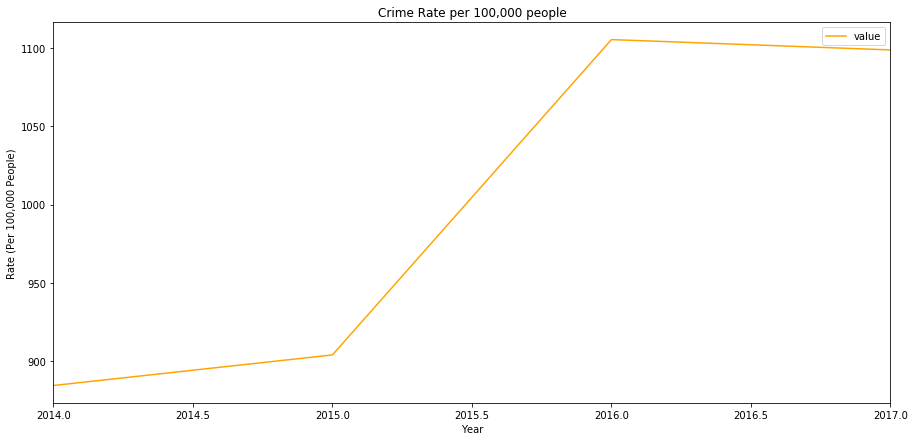

In [31]:
Crime.plot(kind='line', x='year', y='value', figsize=(15,7), color='Orange')

plt.xlim(2014, 2017)
plt.title('Crime Rate per 100,000 people')
plt.xlabel('Year')
plt.ylabel('Rate (Per 100,000 People)')

In [29]:
#Seems that in 2014 Chicago reclassified thier crime statisitcs to start including 'Violent crimes'

In [30]:
Graduation_csv = "Chicago_Graduation_Rates.csv"

Graduation_Rates = pd.read_csv(Graduation_csv)
Chicago_Graduation_Rates = pd.DataFrame(Graduation_Rates)
Chicago_Graduation_Rates.head()

,﻿Years,Graduation Rate
0,2010,79.4
1,2011,80.2
2,2012,80.5
3,2013,81.1
4,2014,81.6


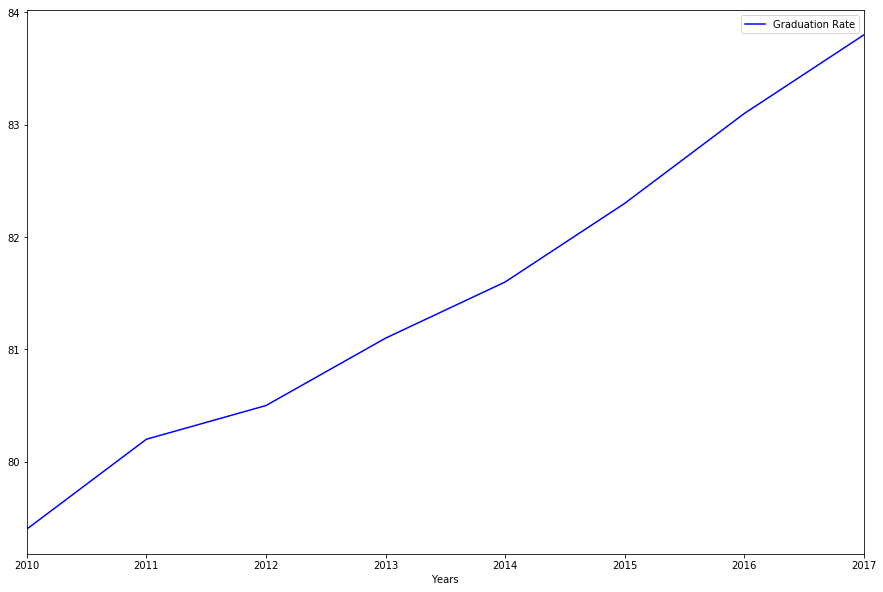

In [31]:
# Chicago_Graduation_Rates.columns.values
# Chart Graduation Rates over time.
Chicago_Graduation_Rates.plot(kind='line', x='\ufeffYears', y='Graduation Rate', figsize=(15,10), color='Blue')

In [32]:
Income_csv = "Chicago_Income_Rates.csv"

Income_Rates = pd.read_csv(Income_csv)
Chicago_Income_Rates = pd.DataFrame(Income_Rates)
Chicago_Income_Rates.head()

,﻿Years,"< $10,000","$10,000 - $14,999","$15,000 - $24,999",med
0,2010,1.9,4.9,16.3,30440
1,2011,1.9,4.5,15.1,30948
2,2012,1.8,4.2,14.9,31052
3,2013,1.8,3.8,14.9,31228
4,2014,1.8,3.6,14.8,31610


In [33]:
# Calculating everyone under $25,000 appending them to 'Chicago_Income_Rate' Datafrome.
Chicago_Income_Rates['% in Poverty'] = Chicago_Income_Rates["< $10,000"]+ Chicago_Income_Rates["$10,000 - $14,999"]+ Chicago_Income_Rates["$15,000 - $24,999"]
Chicago_Income_Rates


,﻿Years,"< $10,000","$10,000 - $14,999","$15,000 - $24,999",med,% in Poverty
0,2010,1.9,4.9,16.3,30440,23.1
1,2011,1.9,4.5,15.1,30948,21.5
2,2012,1.8,4.2,14.9,31052,20.9
3,2013,1.8,3.8,14.9,31228,20.5
4,2014,1.8,3.6,14.8,31610,20.2
5,2015,1.8,3.6,14.7,31703,20.1
6,2016,1.6,3.4,14.2,32418,19.2
7,2017,1.5,3.0,13.3,34420,17.8


In [34]:
Chicago_Income_Rates.columns.values

array(['\ufeffYears', '< $10,000', '$10,000 - $14,999',
       '$15,000 - $24,999', 'med', '% in Poverty'], dtype=object)

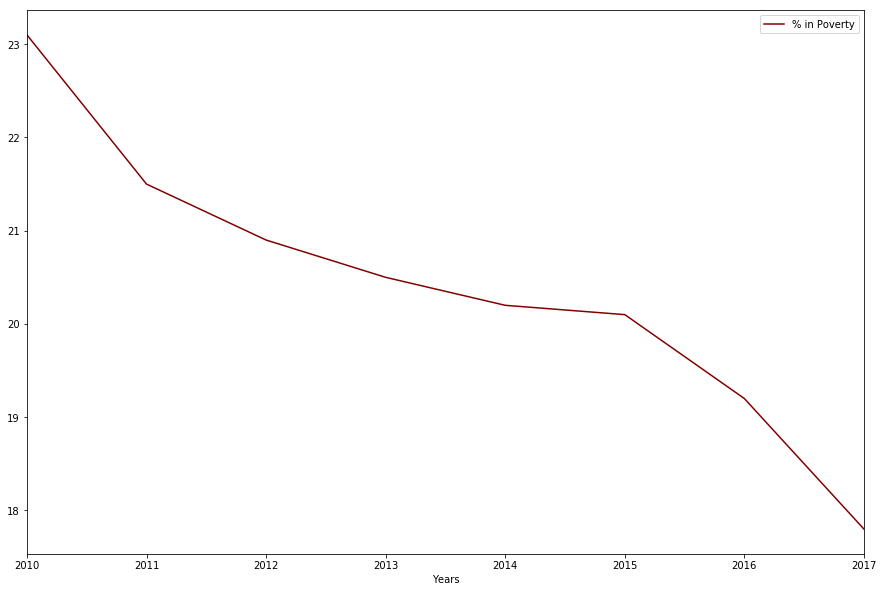

In [35]:
# Plots % in Poverty over time
Chicago_Income_Rates = Chicago_Income_Rates.rename(columns= {'\ufeffYears': 'Years'})
Chicago_Income_Rates.plot(kind='line', x='Years', y='% in Poverty', figsize=(15,10), color='maroon')

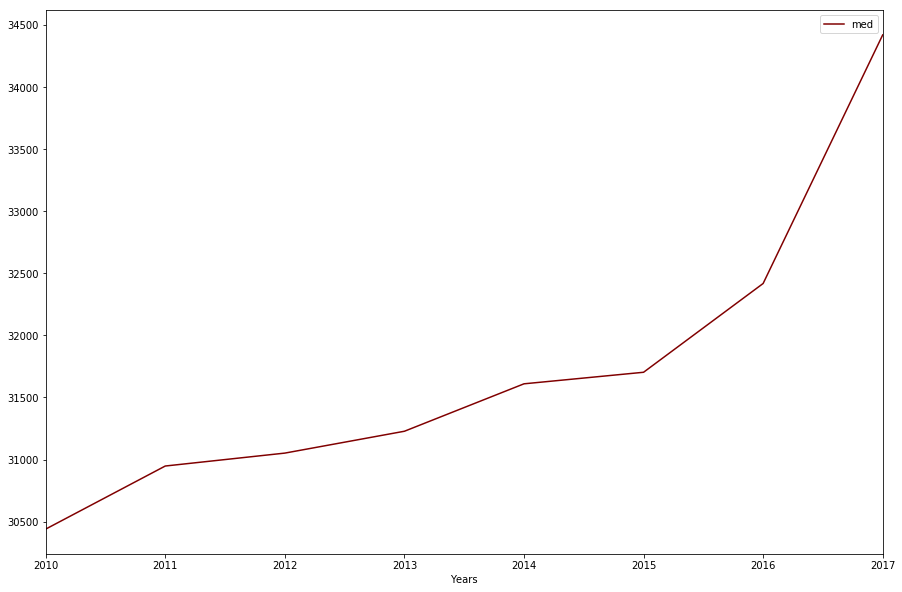

In [36]:
Chicago_Income_Rates.plot(kind='line', x='Years', y='med', figsize=(15,10), color='maroon')